In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
# Load data
def load_dataset():
    X, y = load_iris(return_X_y=True)
    X = X[y!=2]
    y = y[y!=2]
    return X,y

X,y = load_dataset()
print(X.shape, y.shape)

(100, 4) (100,)


Kết quả: (100, 4) (100,)

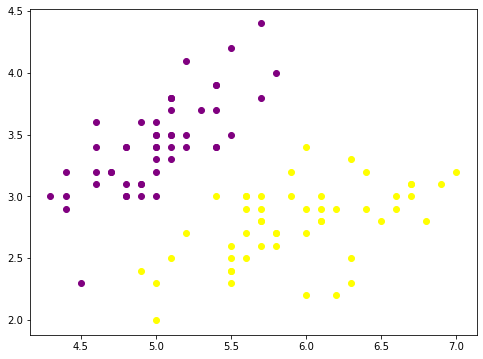

In [3]:
plt.figure(figsize=(8, 6))

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='purple')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='yellow')


plt.show()

Kết quả

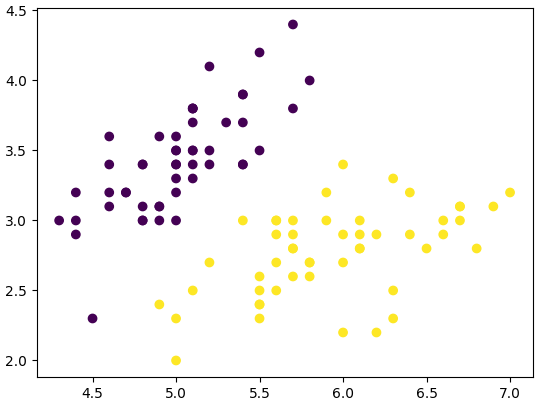

In [4]:
# Định nghĩa mô hình hồi quy logistic bằng PyTorch
class LogisticRegressTorch(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegressTorch, self).__init__()
        # tạo một lớp tuyến tính (nn.Linear) với n_features đầu vào và 1 đầu ra
        self.linear = nn.Linear(n_features, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))


In [5]:
# Định nghĩa lớp dữ liệu
class IrisTorch(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [6]:
# Tạo dữ liệu
dataset = IrisTorch(X, y)

In [7]:
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra bằng cách chia ngẫu nhiên 70,30.
train_size = int(0.7 * dataset.__len__())                                         #70%
test_size = int(0.3 * dataset.__len__())                                          #30%
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [8]:
# Tạo DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [9]:
# Định nghĩa criterion và optimizer 
n_features = X.shape[1]
model = LogisticRegressTorch(n_features=n_features)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# Huấn luyện mô hình 
n_epochs = 100
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)
    
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)
            
            predicted = (outputs >= 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
    
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    
    accuracy = correct / total
    test_accuracies.append(accuracy)
    
    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/100, Train Loss: 0.9705, Test Loss: 0.7304, Test Accuracy: 0.5333
Epoch 2/100, Train Loss: 0.7967, Test Loss: 0.6179, Test Accuracy: 0.5333
Epoch 3/100, Train Loss: 0.6711, Test Loss: 0.5401, Test Accuracy: 0.5333
Epoch 4/100, Train Loss: 0.5826, Test Loss: 0.4927, Test Accuracy: 0.6000
Epoch 5/100, Train Loss: 0.5277, Test Loss: 0.4674, Test Accuracy: 0.9000
Epoch 6/100, Train Loss: 0.4963, Test Loss: 0.4437, Test Accuracy: 1.0000
Epoch 7/100, Train Loss: 0.4674, Test Loss: 0.4336, Test Accuracy: 1.0000
Epoch 8/100, Train Loss: 0.4543, Test Loss: 0.4217, Test Accuracy: 1.0000
Epoch 9/100, Train Loss: 0.4385, Test Loss: 0.4135, Test Accuracy: 1.0000
Epoch 10/100, Train Loss: 0.4281, Test Loss: 0.4105, Test Accuracy: 1.0000
Epoch 11/100, Train Loss: 0.4259, Test Loss: 0.4055, Test Accuracy: 1.0000
Epoch 12/100, Train Loss: 0.4201, Test Loss: 0.4011, Test Accuracy: 1.0000
Epoch 13/100, Train Loss: 0.4147, Test Loss: 0.3943, Test Accuracy: 1.0000
Epoch 14/100, Train Loss: 0.4038, 

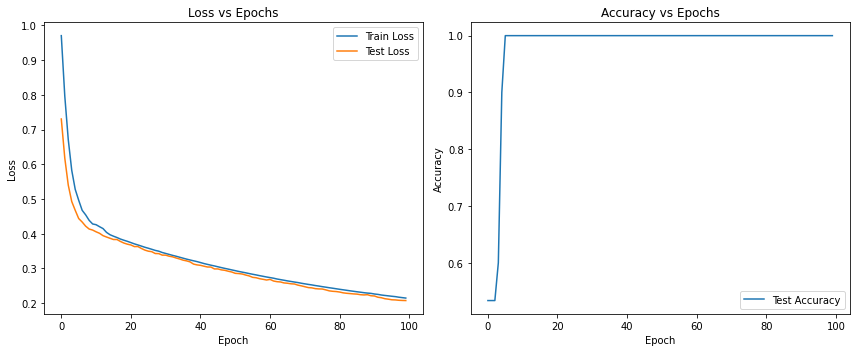

In [11]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()


#Kết quả:

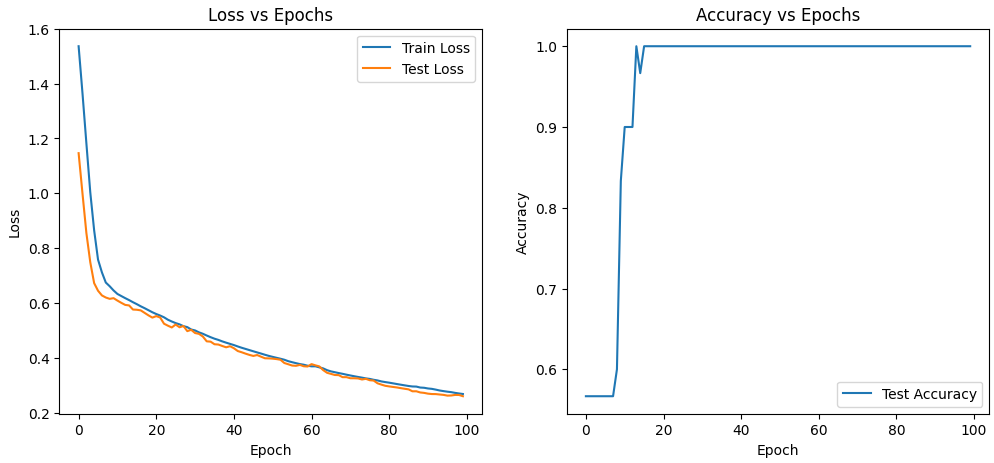